In [7]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 설정함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [8]:
# 동일한 결과를 재현하기 위해서 random seed 고정
import numpy as np
np.random.seed(777)

In [9]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (waning)

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# 1. 데이터 준비

In [10]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) =imdb.load_data(num_words=10000)

In [11]:
from tensorflow.keras.datasets import imdb
import numpy as np

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)    #만이상 단어는 
                                                                                          #사전없음으로 분류

# restore np.load for future normal 
np.load = np_load_old

In [12]:
print(len([len(i) for i in train_data])) 



25000


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series,DataFrame
DataFrame(train_data)



,0
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ..."
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,..."
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5..."
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,..."
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1..."
5,"[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7..."
6,"[1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 532..."
7,"[1, 4, 2, 716, 4, 65, 7, 4, 689, 4367, 6308, 2..."
8,"[1, 43, 188, 46, 5, 566, 264, 51, 6, 530, 664,..."
9,"[1, 14, 20, 47, 111, 439, 3445, 19, 12, 15, 16..."


In [17]:
word_index = imdb.get_word_index() # 특정 단어를 하나의 정수 인덱스로 매핑해놓은 딕셔너리
reverse_word_index = dict([(v,k) for (k, v) in word_index.items()]) # {단어: 정수} => {정수: 단어}로 저장 

# 벡터화 된 문장을 텍스트로 디코딩
# 0, 1, 2번째 단어는 '패딩', '문서 시작', '사전에 없음'을 뜻하는 기호임
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(decoded_review)




? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# 2. 데이터 전처리

In [18]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 결과를 저장할 0 행렬 생성
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 # 문장에 존재하는 단어들만 one-hot encoding
    
    
    return results



# 문장들을 일정한 크기의 벡터로 변환
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [19]:
print(DataFrame(train_data))

                                                       0
0      [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1      [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2      [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3      [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4      [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
5      [1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7...
6      [1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 532...
7      [1, 4, 2, 716, 4, 65, 7, 4, 689, 4367, 6308, 2...
8      [1, 43, 188, 46, 5, 566, 264, 51, 6, 530, 664,...
9      [1, 14, 20, 47, 111, 439, 3445, 19, 12, 15, 16...
10     [1, 785, 189, 438, 47, 110, 142, 7, 6, 7475, 1...
11     [1, 54, 13, 1610, 14, 20, 13, 69, 55, 364, 139...
12     [1, 13, 119, 954, 189, 1554, 13, 92, 459, 48, ...
13     [1, 259, 37, 100, 169, 1653, 1107, 11, 14, 418...
14     [1, 503, 20, 33, 118, 481, 302, 26, 184, 52, 8...
15     [1, 6, 964, 437, 7, 58, 43, 1402, 11, 6, 171, ...
16     [1, 7092, 1662, 11, 4, 1

In [20]:
# 리스트 형태인 레이블을 벡터로 변환
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [21]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(25000, 10000)
(25000,)
(25000, 10000)
(25000,)


In [24]:
X_valid = X_train[:10000]
X_train = X_train[10000:]
y_valid = y_train[:10000]
y_train = y_train[10000:]

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)

(15000, 10000)
(15000,)
(10000, 10000)
(10000,)
(25000, 10000)
(25000,)
(15000, 10000)


# 3. 네트워크 정의

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#relu 는 비선형 적인 연산을 하기 위해 , sigmoid 는 마지막에 값을 제한
#다중분류는 relu  2진 분류 sigmoid

# 4. 모델 컴파일

In [27]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# 5. 모델 학습

In [28]:
history = model.fit(X_train, 
                    y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(X_valid, y_valid))
                    #


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 200us/sample - loss: 0.4733 - acc: 0.8203 - val_loss: 0.3394 - val_acc: 0.8799
Epoch 2/20
15000/15000 [==============================] - 2s 148us/sample - loss: 0.2609 - acc: 0.9086 - val_loss: 0.2792 - val_acc: 0.8903
Epoch 3/20
15000/15000 [==============================] - 2s 146us/sample - loss: 0.1851 - acc: 0.9357 - val_loss: 0.2728 - val_acc: 0.8923
Epoch 4/20
15000/15000 [==============================] - 2s 146us/sample - loss: 0.1428 - acc: 0.9515 - val_loss: 0.3050 - val_acc: 0.8799
Epoch 5/20
15000/15000 [==============================] - 2s 146us/sample - loss: 0.1130 - acc: 0.9617 - val_loss: 0.3148 - val_acc: 0.8854
Epoch 6/20
15000/15000 [==============================] - 2s 149us/sample - loss: 0.0888 - acc: 0.9714 - val_loss: 0.3401 - val_acc: 0.8829
Epoch 7/20
15000/15000 [==============================] - 2s 150us/sample - loss: 0.0702 - acc: 0.9785 - val_l

In [29]:
hisoty_dict=history.history
hisoty_dict

{'loss': [0.4733024925072988,
  0.26088067553838096,
  0.18508845417499542,
  0.14284943479299544,
  0.11298478163878123,
  0.08883720237016678,
  0.07021122798522314,
  0.05379766091505687,
  0.04247210757931073,
  0.03029430673420429,
  0.02233659054040909,
  0.015247971141835053,
  0.010984289042154947,
  0.007887592440843583,
  0.005281222547776997,
  0.004301415955709914,
  0.001957906028876702,
  0.0018015028004844983,
  0.00153511992264539,
  0.0006493465710120897],
 'acc': [0.82026666,
  0.9086,
  0.9357333,
  0.9515333,
  0.96173334,
  0.9714,
  0.9784667,
  0.98373336,
  0.988,
  0.99266666,
  0.9946667,
  0.99666667,
  0.9982,
  0.99906665,
  0.9994,
  0.9993333,
  0.99986666,
  0.99986666,
  0.9998,
  0.99993336],
 'val_loss': [0.33937316870689394,
  0.27915312824249267,
  0.2728008673429489,
  0.30504114298820495,
  0.3147794120788574,
  0.3401206741094589,
  0.3985004046916962,
  0.4248450484275818,
  0.4575395022392273,
  0.5009948331832885,
  0.5667211866855622,
  0.608

# 6. 학습 과정 확인

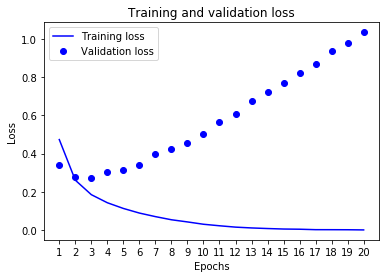

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss') # 'b'는 파란색 실선을 의미
plt.plot(epochs, val_loss, 'bo', label='Validation loss') # 'bo'는 파란색 점을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

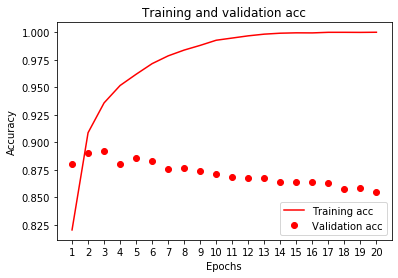

In [31]:
import matplotlib.pyplot as plt


acc, val_acc = history.history['acc'], history.history['val_acc']
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()

plt.show()

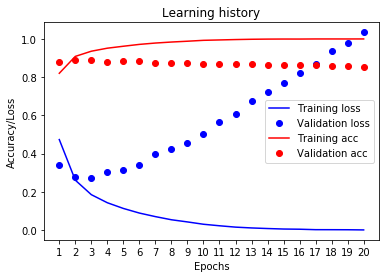

In [32]:
import matplotlib.pyplot as plt

loss, val_loss = history.history['loss'], history.history['val_loss']
acc, val_acc = history.history['acc'], history.history['val_acc']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Learning history')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test loss(20 epochs): ', test_loss)
print('test acc(20 epochs): ', test_acc)

25000/25000 [==============================] - 4s 153us/sample - loss: 1.1321 - acc: 0.8409
test loss(20 epochs):  1.1320749504351615
test acc(20 epochs):  0.84092


# 7. (과대적합 되기 전까지) 모델 학습

In [34]:
# 기존 model 객체를 사용하면 이어서 학습되므로, 새로운 model 객체를 생성함
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_train, 
                    y_train,
                    epochs=3,
                    batch_size=256,
                    validation_data=(X_valid, y_valid))

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 3s 192us/sample - loss: 0.4565 - acc: 0.8163 - val_loss: 0.3324 - val_acc: 0.8792
Epoch 2/3
15000/15000 [==============================] - 2s 159us/sample - loss: 0.2516 - acc: 0.9140 - val_loss: 0.2761 - val_acc: 0.8907
Epoch 3/3
15000/15000 [==============================] - 2s 157us/sample - loss: 0.1813 - acc: 0.9373 - val_loss: 0.2938 - val_acc: 0.8827


In [35]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test loss(3 epochs): ', test_loss)
print('test acc(3 epochs): ', test_acc)

25000/25000 [==============================] - 4s 142us/sample - loss: 0.3200 - acc: 0.8704
test loss(3 epochs):  0.31997182832717896
test acc(3 epochs):  0.87044


# 8. 학습된 모델로 새로운 데이터 예측

In [36]:
# 여러 개 동시에 예측
result = model.predict(X_test)
print(result)

print()

# 하나씩 개 동시에 예측
sample = X_test[0]
result = model.predict(np.expand_dims(sample, axis=0))            #샘플중 하나만 예측 할때는 차원을 늘려서 
                                                                #사용하기 위해 expand_dims  사용
                                                                
print(result)

[[0.19394329]
 [0.9992661 ]
 [0.7455804 ]
 ...
 [0.07321474]
 [0.05466616]
 [0.24936396]]

[[0.19394329]]
